# Исследование объявлений о продаже квартир


**Описание проекта:**
в моем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

**Цель проекта:** провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. 

**Описание данных:** по каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя. 


### Загрузка датасета и изучение общей информации

In [1]:
import pandas as pd
data = pd.read_csv('/.../real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

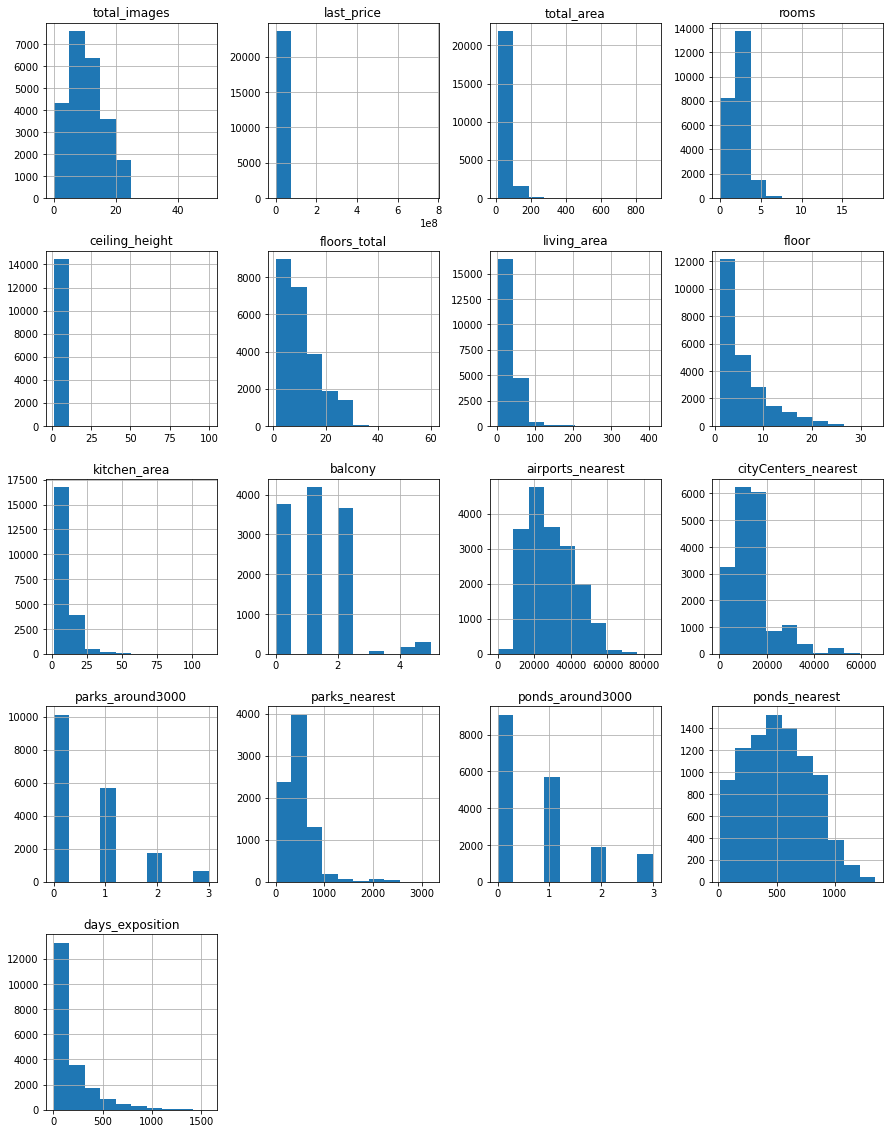

In [3]:
data.hist(figsize=(15, 20))

**Вывод:** датайфрейм состоит из 21 столбцов и 23599 строк. Есть столбцы с пропущенными значениями. В основном тип данных в столбцах числовой: int64 и float64. Но есть столбцы и с булевым типом данных, а также текстовым.

### Предобработка данных

#### Анализ пропущенных значений 
Метод info показал, что пропущенные значения были в следующих столбцах:
1. ceiling_height
2. living_area
3. is_apartment
4. kitchen_area
5. balcony
6. locality_name      
7. airports_nearest      
8. cityCenters_nearest   
9. parks_around3000      
10. parks_nearest         
11. ponds_around3000      
12. ponds_nearest         
13. days_exposition


Высоту потолка (столбец 'ceiling_height') владельцы квартир могли не указать, так как не знали точное значение и, возможно, не посчитали этот параметр важным.

In [4]:
#узнаем общее число отсутствующих значений в столбце 'ceiling_height'
data['ceiling_height'].isnull().sum()

9195

Пропущенных значений достаточно много. Их можно заменить на медиану от всех непропущенных значений. Предположительно разброс между размером потолка не должен быть таким большим. Однако есть опасения, что если заменить все 9195 значений на медианное, то это сильно повлияет на статистику, но все же попробуем это сделать.

In [5]:
#найдем медиану столбца 'ceiling_height
median_ceil = data['ceiling_height'].median()
median_ceil

2.65

Значение 2.65 кажется близким к правде. Возможно, если им заменить отстутствующие значения, то это не так сильно исказит выборку.

In [6]:
#заменяем все отсутствующие значения на медиану и убеждаемся, что больше их не осталось
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceil)
data['ceiling_height'].isnull().sum()

0

Жилая площадь квартиры (столбец 'living_area') также могли не указать, так как не знали точных данных.

In [7]:
#узнаем общее число отсутствующих значений в столбце 'living_area'
data['living_area'].isnull().sum()

1903

Количество пустых значений в столбце 'living_area' значительно меньше, чем в столбце 'ceiling_height', что логично, люди в большинстве своем считают жилую площадь квартиры одним из важнейших параметров. Возможно, эти пустые значения также можно медианой заменить.

In [8]:
#найдем медиану столбца 'living_area'
median_area = data['living_area'].median()
median_area

30.0

Медиана оказалась 30 метров. Заменим на нее отсутствующие значения.

In [9]:
#заменяем все отсутствующие значения на медиану и убеждаемся, что больше их не осталось
data['living_area'] = data['living_area'].fillna(median_area)
data['living_area'].isnull().sum()

0

In [10]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Следующий столбец с отсутствующими данными - 'is_apartment', который предположительно означает, является ли квартира апартаментами. Как и в примере с балконами из инструкции, я думаю, что владельцы квартир пропускали этот пункт, если их квартира не являлась апартаментами. Предположу, что в данном столбце булевые значения, если это так, то я заменю все отсутствующие значения на False.

In [11]:
#проверяем уникальные значения в столбце 'is_apartment'
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [12]:
#заменяем отсутствующие значения в столбце 'is_apartment' на False и убеждаемся, что больше их не осталось
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isnull().sum()

0

Следующий столбец - 'kitchen_area'. Если число отсутствующих значений не окажется преобладающим, то их также можно заменить на медиану.

In [13]:
#узнаем общее число отсутствующих значений в столбце 'kitchen_area'
data['kitchen_area'].isnull().sum()

2278

In [14]:
#найдем медиану столбца 'kitchen_area'
median_kitchen = data['kitchen_area'].median()
median_kitchen

9.1

Медианой для площади кухни стало значение чуть 9,1 метров, что вполне соответствуют стандартной кухне в российской квартире.

In [15]:
#заменяем все отсутствующие значения на медиану и убеждаемся, что больше их не осталось
data['kitchen_area'] = data['kitchen_area'].fillna(median_kitchen)
data['kitchen_area'].isnull().sum()

0

Столбец 'balcony' можно изменить так, как предложено в инструкции: заменить пропуски на 0, так как скорее всего пользователи просто пропускали этот параметр, если у них нет балконов.

In [16]:
#заменяем отсутствующие значения в столбце 'balcony' на 0 и убеждаемся, что больше их не осталось
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isnull().sum()

0

Следующий столбец - 'locality_name'. Необходимо узнать, какие значения входят в этот столбец и сколько всего отсутсвующих значений.

In [17]:
#узнаем какие уникальные значения есть в столбце 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
data['locality_name'].isnull().sum()

49

Количество уникальных значений огромно, что не удивительно, при этом пропусков всего 49. Не думаю, что было бы корректно вместо отсутствующих значений указывать Санкт-Петербург. Я думаю, что не будет критично, если оставить пропуски.

Следующая группа столбцов относится к картографическим данным airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest. Предположительно пропуски в данных в этих столбцац вызваны ошибками в выгрузке или ошибками иного рода, так как пользователи сами не указывали эти данные. Для начала узнаем количество пропусков в каждом из таких столбцов.

In [19]:
data['airports_nearest'].isnull().sum()

5542

In [20]:
data['cityCenters_nearest'].isnull().sum()

5519

In [21]:
data['parks_nearest'].isnull().sum()

15620

In [22]:
data['parks_around3000'].isnull().sum()

5518

In [23]:
data['ponds_nearest'].isnull().sum()

14589

In [24]:
data['ponds_around3000'].isnull().sum()

5518

Как видно в 4 из 6 столбцов количество пропущенных значений сопоставимо и колеблется от 5518 до 5542. В солбцах 'parks_nearest' и 'ponds_nearest' проблема совершенно другого рода. В данных столбцах количество пропусков составляет более половины от выборки. Есть предположение, что в первом случае пропуски могут быть связаны с определенной, возможно, при выгрузке данных из каких-то районов произошла ошибка. Во втором случае пропуски настолько значительны, что за этим может скрываться какая-то крупная техническая ошибка. В любом случае нужно проверить, в каких локациях обнаружены пропуски.

In [25]:
#для начала узнаем, как распределены локации квартир по всей выборке
data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Как и ожидалось, в выборке большинство квартир находятся в Санкт-Петербурге. Далее посмотрим, где находятся в большинстве своем квартиры с пропусками. Сначала посмотрим те столбцы, где количество пропусков составляет около 5,5 тысяч.

In [26]:
data[data['airports_nearest'].isnull()].groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

In [27]:
data[data['cityCenters_nearest'].isnull()].groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

In [28]:
data[data['parks_around3000'].isnull()].groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

In [29]:
data[data['ponds_around3000'].isnull()].groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

Гипотеза подтвердилась. Отстутствуют значения из определенных локаций причем полностью. Наиболее значительные примеры: совсем нет данных из Мурино, Кудрово, Всеволожск, Гатчина, Выборг и множества других. Явно ошибка связана с выгрузкой данных. В нормальных условиях данные лучше бы выгрузить еще раз без ошибок. Неправильным решением было бы изменять отсутствующие значения на медианы, так как это бы сильно исказило статистику: большинство квартир из выборки находятся в Санкт-Петербурге, при этом отсутствуют значения в пригороде, причем некоторые, такие как Выборг - это очень дальний пригород. Цены на жилье в пригородах будут сильно отличаться от цен в Санкт-Петербурге. Поэтому единственный правильный вариант ввиду отсутствия иного - оставить все как есть и проводить исследовательский анализ без данных из этих локаций. Проверим оставшиеся 2 столбца.

In [30]:
data[data['parks_nearest'].isnull()].groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      8437
посёлок Мурино        522
посёлок Шушары        440
Всеволожск            398
посёлок Парголово     317
Гатчина               307
деревня Кудрово       299
Выборг                237
Колпино               205
Кудрово               173
Name: locality_name, dtype: int64

In [31]:
data[data['ponds_nearest'].isnull()].groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      7738
посёлок Мурино        522
Всеволожск            398
Гатчина               307
деревня Кудрово       299
посёлок Шушары        288
посёлок Парголово     271
Выборг                237
Пушкин                192
Кудрово               173
Name: locality_name, dtype: int64

Как и ожидалось в выборку с отсутствующими значениями в столбцах 'parks_nearest' и 'ponds_nearest' попали не только локации, по которым нет данных и в других столбцах с картографической информацией, но и квартиры из Санкт_Петербурга. В данном случае заменять значения на медианные также не имеет смысла, так как тогда мы сильно испортим всю статистику, из-за того, что больше половины значений будут составлять медианы. Лучше оставить все, как есть, однако держать в голове на этапе исследовательского анализа, что данные есть в менее чем половине случаев из первоначальной выборки. 

Последний столбец, в котором оказались пропуски - 'days_exposition'. До конца непонятно, из-за чего возникла ошибка. В данном столбце указано количество дней, сколько квартира была выставлена на продажу. Не очень понятно, учитывает ли этот показатель те квартиры, которые продаются в данный момент, а не только фиксирует количество дней на момент снятия объявления о продаже. Если этот показатель не заполняется по продающимся в данный момент квартирам, то пропуски в этом столбце логичны. Если нет, то возможно имеет место техническая ошибка. В любом случае я думаю, что не будет критичным заменить пропуски на медианы в этом столбце. Если даже квартиры все еще продаются, то это значение будет ожидаемым количеством дней размещения объявления.

In [32]:
#узнаем количество отсутствующих значений в столбце 'days_exposition'
data['days_exposition'].isnull().sum()

3181

In [33]:
#находим медиану столбца 'days_exposition'
median_days = data['days_exposition'].median()
median_days

95.0

Медиана составила 95 дней, что вполне соответсвуют ожидаемому сроку продажи квартиры.

In [34]:
#заменяем все отсутствующие значения на медиану и убеждаемся, что больше их не осталось
data['days_exposition'] = data['days_exposition'].fillna(median_days)
data['days_exposition'].isnull().sum()

0

**Вывод:** часть пропусков удалось заменить на медианные значения. Некоторые пропуски, такие как наименование населенных пунктов, пришлось оставить. Отдельно выделим пропуски в картографических столбцах. В некоторых из них нет данных из нескольких населенных пунктов, а в других нет данных более чем для половины выборки.

#### Изменение типов данных

In [35]:
#Еще раз вызываем метод info и смотрим, в каких столбцах нас не устраивает тип данных. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Их всех столбцов только у 'first_day_exposition' неподходящий тип данных, так как с датами неудобно работать, когда их тип object. Почти всех остальных случаех, если значиение целочисленные, такие как в столбце 'rooms' указан тип данных int64, а в столбцах с вещественными числами, 'таких как parks_nearest' указан тип float64. Единственное исключение - столбец days_exposition, в котором количество дней целочислено и его можно заменить на int64, хотя это и не так критично (как плюс будет меньше памяти занимать и быстрее работать). Также верно указаны столбцы с булевым типом. 

In [36]:
#меняем тип данных в столбце 'first_day_exposition'
data['first_day_exposition'] = (
    pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S'))
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [37]:
#меняем тип данных в столбце 'days_exposition'
data['days_exposition'].astype('int64')

0         95
1         81
2        558
3        424
4        121
        ... 
23694     95
23695     45
23696     95
23697    602
23698     95
Name: days_exposition, Length: 23699, dtype: int64

In [38]:
#меняем тип данных в столбце 'last_price'
data['last_price'].astype('int64')

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

**Вывод:** изменили тип данных в столбце с датой начала выставления объявления с object на datetime64, в столбце с количеством дней и с ценой квартир с float64 на int64.

#### Удаление неявных дубликатов в столбце с названиями

In [39]:
#еще раз глянем, какие уникальные значения есть в столбце 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [40]:
data['locality_name'].nunique()

364

Всего уникальных значений 364. Наиболее очевидные дубликаты, связаны с буквой 'ё' заменим её на 'е' и посмотрим, стало ли меньше уникальных значений.

In [41]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
data['locality_name'].nunique()

330

Количество уникальных значений сократилось на 34. Также дубли возникают из-за того, что топоним локации по-разному отражается. Иногда наименования встречаются с топонимом, а иногда нет, например "Кудрово" и "деревня Кудрово". Поэтому чтобы не возникало путаницы топонимы лучше в целом удалить.

In [42]:
data['locality_name'] = data['locality_name'].replace(['поселок городского типа ', 'поселок ', 'деревня ', 'городской поселок ', 
                                                       'село ', 'садовое товарищество ', 'городской ', 
                                                       'садоводческое некоммерческое товарищество '], '', regex=True)
data['locality_name'].nunique()

309

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный код
</div>

In [43]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

**Вывод**: количество уникальных значений в названиях локаций сократилось с 360 до 304.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Обработка аномалий

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

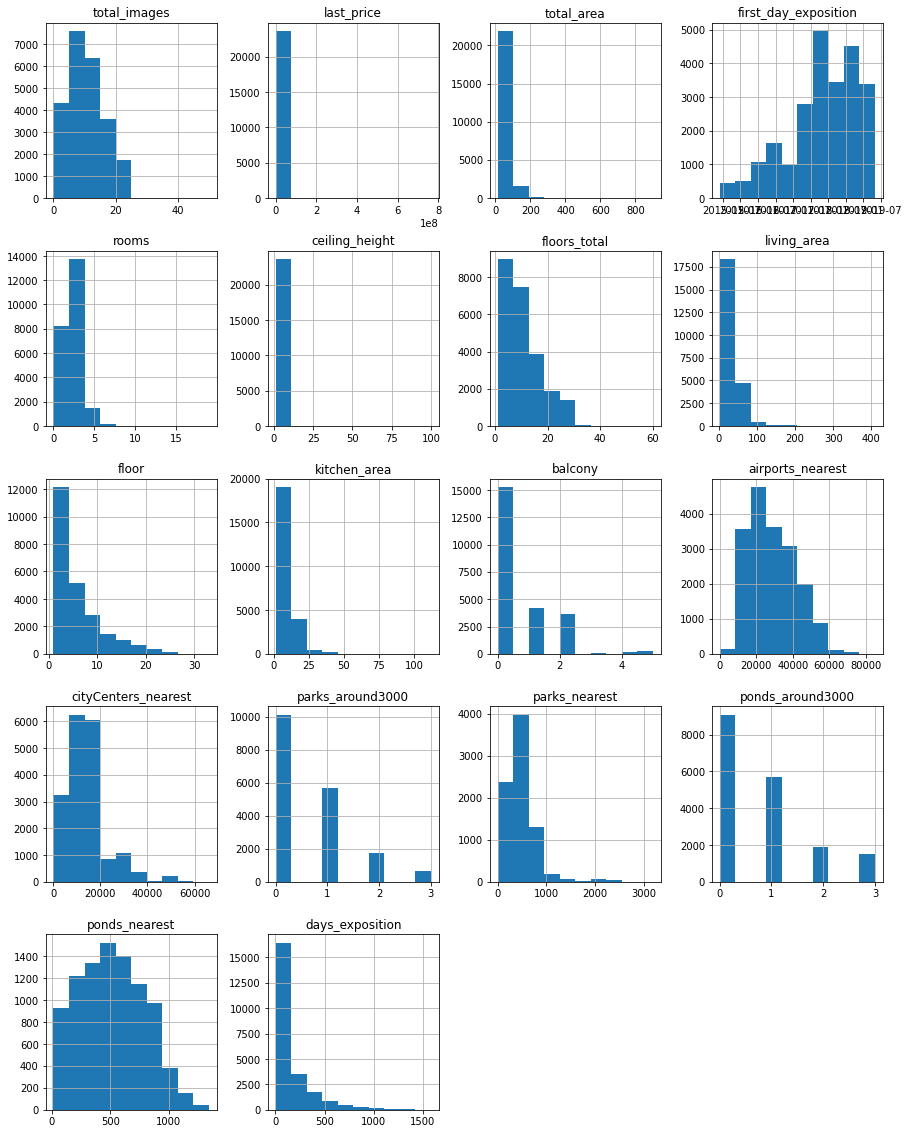

In [45]:
#вызовем еще раз все гистромы, чтобы понять, в каких столбцах могут быть аномалии
data.hist(figsize=(15, 20))

Первый столец, где могут быть аномалии - 'total images'. На гистограме видно, что большинтсво квартир выставляют с не более чем 25-30 фотографиями, но есть и исключения.

In [46]:
#посмотрим, есть ли квартиры с аномальным количеством фотографий
data['total_images'].sort_values(ascending=False).head(20)

12667    50
9778     50
17396    50
15157    42
1058     39
21199    37
10523    35
308      35
99       32
21076    32
7393     32
7938     32
5349     31
22517    31
20280    30
3455     30
11359    29
7899     29
20465    29
4692     28
Name: total_images, dtype: int64

Есть часть квартир, у которых число фотографий более 30. Не думаю, что здесь есть значительные аномалии, просто очень старательные владельцы :)

Следующий столбец - 'last price'. По гистограме видно, что в этом столбце явно есть значительные выбросы. Его лучше исследовать более подробно.

In [47]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Из описания видно, что средняя стоимость квартир составляет 6.5 млн, а медиана - 4.6 млн руб. При этом есть значительные аномалии. Максимальное значение составляет 763 млн. Такие квартиры действительно существуют, но это исключительные случаи и они сильно выбиваются из основной статистики.

In [48]:
#импортируем matplotlib для дальнейших манипуляций с графиками
import matplotlib.pyplot as plt

<AxesSubplot:>

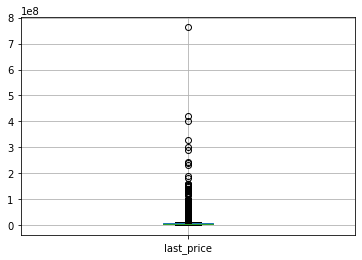

In [49]:
# построим боксплот для того, чтобы понимать, как много аномальных значений существует.
data.boxplot(column='last_price')

(0.0, 200000000.0)

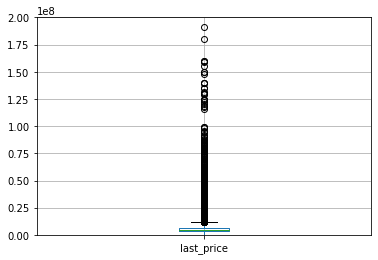

In [50]:
#немного приблизим ось y
data.boxplot(column='last_price')
plt.ylim(0, 200000000)

Стоимость подавляющего числа квартир находится в очень узком диапазоне до 10 млн руб. Существенная часть элитного жилья находится в диапазоне от 10 до 100 млн руб. (на графике боксплот отражается как сплошная черная линия). При этом лишь небольшое количество квартир стоят более 100 млн руб. Попробуем глянуть, что из себя представляют самые дорогие квартиры.

In [51]:
data.sort_values(by='last_price', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,...,9.1,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,...,40.0,0.0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,70.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.7,6,False,...,30.2,0.0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,95.0
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7.0,182.8,4,False,...,29.8,0.0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.0,7,False,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
5893,3,230000000.0,500.0,2017-05-31,6,2.65,7.0,30.0,7,False,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
8900,13,190870000.0,268.0,2016-03-25,3,2.65,8.0,132.0,7,False,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0


Некоторые квартиры из этого списка выглядят правдоподобно. Но у некоторых очень подозрительные параметры. Некоторые квартиры всего 30 и 60 метров, при этом их стоимость около 200 млн руб. А площадь кухни самой дорогой квартиры Санкт-Петербурга всего 9 метров. Возможно, эти квартиры находятся в исторических домах и большая стоимость связана с этим. Но все же они сильно выбиваются из всей статистики и, возможно, функционируют по особым правилам. Я думаю, что лучше убрать из выборки аномальные квартиры, стоимостью более 100 млн руб., так как невозможно до конца понять природу их высокой стоимости. При этом выборка от этого вряд ли сильно пострадает и законы рынка недвижимости не исказятся.

In [52]:
#удалим квартиры с аномально высокой стоимостью
data = data.query('last_price < 100000000')

In [53]:
#посчитаем, сколько квартир осталось
data['last_price'].count()

23662

Было 23699 квартир, стало 23662. Выборка существенно не пострадала. 

Идем дальше, следующий столбец с аномалиями - 'total_area'.

In [54]:
data['total_area'].describe()

count    23662.000000
mean        59.928048
std         33.471517
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        590.000000
Name: total_area, dtype: float64

Средний размер квартир - 50 метров, медианный - 52. Максимальный - 590. Посмотрим, как много таким больших квартир.

<AxesSubplot:>

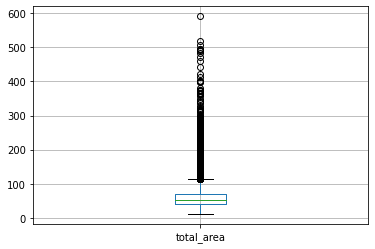

In [55]:
data.boxplot(column='total_area')

Боксплот определил аномальные квартиры те, размер которых примерно больше 110 метров. Действительно, в среднем так и есть. Квартиры большего размера уже считаются элитными и вряд ли доступны среднего человеку. Однако таких квартир очень много, и трудно выделить какое-то очень редкое значение, возможно, только самую крупную квартиру размером 590 метров. Но не вижу смысла удалить одну только эту квартиру. Думаю, что можно оставить все, как есть.

В столбце 'first_day_exposition' все в порядке, поэтому сразу перейдем к столбцу 'rooms'.

In [56]:
data['rooms'].describe()

count    23662.000000
mean         2.065717
std          1.069592
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В среднем в квартирах 2 комнаты. Есть квартира с 19 комнатами, однако также настораживают квартиры с 0 комнат. 

<AxesSubplot:>

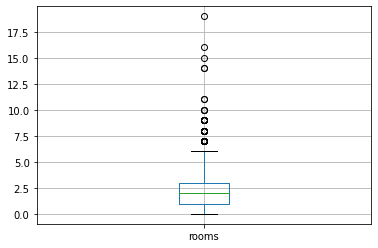

In [57]:
data.boxplot(column='rooms')

In [58]:
data.sort_values(by='rooms', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09,19,2.65,5.0,264.5,2,False,...,27.6,0.0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,False,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,100.0,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
20829,6,28659000.0,245.4,2016-03-31,14,2.65,4.0,168.3,2,False,...,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,False,...,16.6,0.0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,False,...,11.9,0.0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,False,...,13.3,0.0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,95.0
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,False,...,18.8,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,95.0
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,False,...,30.0,1.0,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,False,...,19.8,0.0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0


Лишь небольшое количество квартир имеют 6 и более комнат, и как видно из таблицы выше, у них очень большая площадь, что логично. Не думаю, что нужно их удалять. Природа аномалий ясна, в Санкт-Петербурге действительно есть такие огромные квартиры в доходных домах. Другой вопрос, что за квартиры с 0 комнат.

In [59]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,2.65,24.0,15.50,2,False,...,9.1,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,2.65,14.0,17.00,1,False,...,9.1,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17.0,24.75,4,False,...,9.1,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,2.65,26.0,24.30,19,False,...,9.1,1.0,Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,2.65,10.0,30.00,7,False,...,9.1,0.0,Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,2.65,25.0,18.00,16,False,...,9.1,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,2.65,24.0,18.00,4,False,...,9.1,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,2.65,19.0,30.00,8,False,...,9.1,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,2.65,9.0,18.00,8,False,...,9.1,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [60]:
data.query('rooms == 0').head(20)['studio']

144      True
349     False
440      True
508     False
608      True
697      True
716      True
780     False
839     False
946     False
1173     True
1174     True
1220     True
1260     True
1277     True
1528     True
1574    False
1600     True
1625    False
2055     True
Name: studio, dtype: bool

В выборке 197 квартир с 0 комнат. На первый взгляд видно, что они очень маленькие. Также, если изучить столбец 'studio' видно, что большинство из них являются студиями. Возможно, те, кто размещают квартиры, не считают основное помещение таких квартир полноценной жилой комнатой и поэтому указывают, что жилых комнат 0. Также не стоит ничего удалять.


Следующий столбец - высота потолка 'ceiling_height'.

In [61]:
data['ceiling_height'].describe()

count    23662.000000
mean         2.723344
std          0.988243
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Смущает максимальное значение в 100 метров и минимальной в 1 метр

<AxesSubplot:>

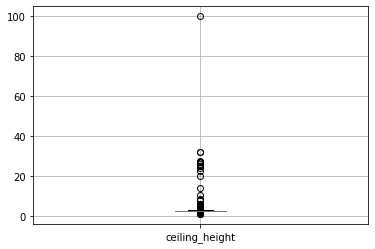

In [62]:
data.boxplot(column='ceiling_height')

Сразу выделяется потолок в 100 метров, сократим размер оси y

(0.0, 35.0)

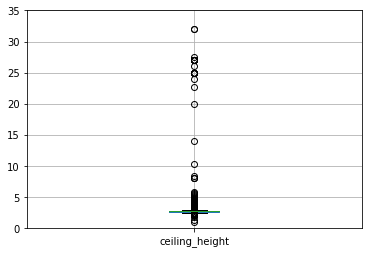

In [63]:
data.boxplot(column='ceiling_height')
plt.ylim(0, 35)

Есть ряд выбросов выше 6 метров. Трудно себе представить такие большие потолки. При этом не всегда очевидно, с чем связана ошибка. В случае с 25 метрами можно предположить, что имеется в виду 2,5 метро, однако с 15 метрами вряд ли это может быть. Я думаю, что такие выбросы лучшее удалить.

In [64]:
data = data.query('ceiling_height < 6')

Также посмотрим, есть ли выбросы с другой стороны.

(0.0, 6.0)

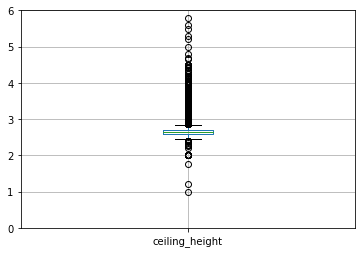

In [65]:
data.boxplot(column='ceiling_height')
plt.ylim(0, 6)

Есть несколько выбросов, где потолки меньше 2 метров, что крайне сложно себе представить, удалим эти квартиры.

In [66]:
data = data.query('ceiling_height > 2')

Следующий столбец - 'floors_total'.

In [67]:
data['floors_total'].describe()

count    23533.000000
mean        10.680959
std          6.595681
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Максимумальный этаж - 60. Не удивительно. Санкт-Петербург крупный город с несколькими небоскребами. Не думаю, что есть смысл подробно этот столбец изучать, так как сходу аномалий нет. Тоже относится и к столбцу 'floor'.

Столбцы 'living_area' и 'kitchen_area' производные из столбцы 'total_area', и раз мы решили в нем ничего не удалять, так как предполагаем, что квартиры более 500 метров существуют, то и в данных столбцах ничего менять не будем. Согласно гистрограмме из начала подраздела, есть кухни более 100 метров. Вполне может быть, если у тебя квартира 500 метров :)

В остальных столбцах каких-то больших аномалий исходя из гистрограмм не видно.

In [68]:
#проверим датафрейм на явные дубликаты
data.duplicated().sum()

0

**Вывод**: часть квартир, у которых аномально высокая цена или неправдоподобно высокие или низкие потолки была удалена. По другим параметрам было принято решение не удалять редкие значения, так как они выглядят правдоподобно.

### Посчитайте и добавьте в таблицу новые столбцы

In [69]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [70]:
#создаем столбец с ценой одного квадратного метра
data['price_per_metr'] = data['last_price'] / data['total_area']
data['price_per_metr']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_per_metr, Length: 23619, dtype: float64

In [71]:
#создаем столбец с днем недели публикации объявления
data['day_of_week_exposition'] = data['first_day_exposition'].dt.dayofweek
data['day_of_week_exposition']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: day_of_week_exposition, Length: 23619, dtype: int64

In [72]:
#создаем столбец с месяцем публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month
data['month_exposition']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_exposition, Length: 23619, dtype: int64

In [73]:
# создаем столбец с годом публикации объявления 
data['year_exposition'] = data['first_day_exposition'].dt.year
data['year_exposition']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_exposition, Length: 23619, dtype: int64

In [74]:
# создаем столбец с типом этажа квартиры
# для начала создаем функцию, которая будет переводить значения этажей
def type_floor(raw):
    if raw['floor'] == 1:
        return 'первый'
    elif raw['floor'] == raw['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [75]:
#применяем функцию и создаем столбец
data['type_floor'] = data.apply(type_floor, axis=1)
data['type_floor']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: type_floor, Length: 23619, dtype: object

In [77]:
#создаем столбец с расстоянием до центра в километрах
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data['cityCenters_nearest_km'] 

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 23619, dtype: float64

**Вывод:** все необходимые для анализа столбцы созданы.

### Исследовательский анализ данных

#### Изучение отдельных столбцов

In [78]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_metr',
       'day_of_week_exposition', 'month_exposition', 'year_exposition',
       'type_floor', 'cityCenters_nearest_km'],
      dtype='object')

(0.0, 200.0)

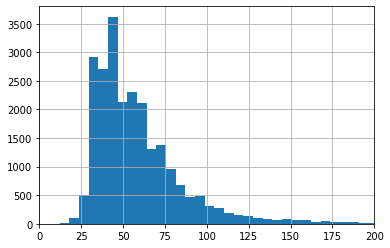

In [79]:
#рассмотрим гистограмму столбца 'total area'
#ограничим ее отображение по оси x, так как есть несколько особо крупных квартир, что мешает её детальному изучению
data['total_area'].hist(bins=100)
plt.xlim(0, 200)

Гистограмма общей площади имеет явное распределение Пуассона с вершиной в диапазоне 40-45 метров и очень длинным правым хвостом, что вполне логично: большинство квартир - однушки и небольшие двушки. А дальше, чем больше квартира, тем меньшее количество людей ее могут позволить.

(0.0, 120.0)

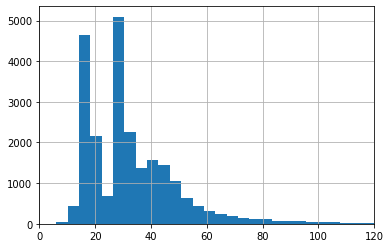

In [80]:
#рассмотрим гистограмму столбца 'living area'
#ограничим ее отображение по оси x, так как есть несколько особо крупных квартир, что мешает её детальному изучению
data['living_area'].hist(bins=100)
plt.xlim(0, 120)

С жилой площадью наблюдается интересная особенность. На гистрограмме явно выделяются 2 вершины. Я думаю, что это связано с разделением между однокомнатными и двухкомнатными квартирами. Это не так заметно в случае с общей площадью, так как кухня и нежилые участки квартиры сокращают разницу. В случае же с жилой площадью первый пик наблюдается в диапазоне 16-18 метров, что соответствует примерно однокомнатной квартире. Дальше есть большой провал особенно в диапазоне 22-26 метров. Однокомнатные с такими большими комнатами редко встречаются, как и двухкомнатными с такими маленькими комнатами тоже. Следующий пик наблюдается в районе 30 метров, что соответствует типичной двухкомнатной квартире.

(0.0, 30.0)

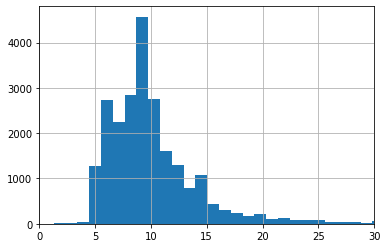

In [81]:
#рассмотрим гистограмму столбца 'kitchen_area'
#ограничим ее отображение по оси x, так как есть несколько особо крупных квартир, что мешает её детальному изучению
data['kitchen_area'].hist(bins=100)
plt.xlim(0, 30)

Никаких неожиданностей при анализе площади кухонь не обнаружилось. Пресловутые 9-метровые квадратные кухни, которые ставили в советских квартирах и сейчас продолжают ставить во многие современные квартиры, явно доминируют. Нет в российских семьях любви к большим кухням западного типа.

(0.0, 25000000.0)

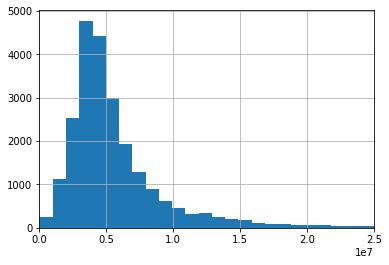

In [82]:
#рассмотрим гистограмму столбца 'last_price'
#ограничим ее отображение по оси x, так как есть несколько особо дорогих квартир, что мешает её детальному изучению
data['last_price'].hist(bins=100)
plt.xlim(0, 25000000)

Гистограмма стоимости квартир также имеет распределения, однако правый хвост еще более длинный, чем в других диаграммах. И это с учетом того, что на прошлых этапах аномально дорогие квартиры были убраны из выборки и на графике отображение правого хвоста сильно ограничено. Однако таких дорогих квартир крайне мало. Более 90% квартир стоят до 10 млн руб. А пик квартир находится в диапазоне 3-5 млн руб.

(0.0, 8.0)

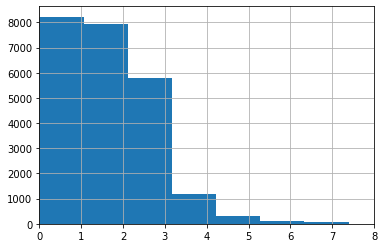

In [83]:
#рассмотрим гистограмму столбца 'rooms'
#ограничим ее отображение по оси x, так как есть несколько квартир с очень большим количеством комнат 
#что мешает её детальному изучению
data['rooms'].hist(bins=18)
plt.xlim(0, 8)

Однокомнатных и двухкомнатных квартир примерно одинаковое количество. Немного меньше трехкомнатных. А квартиры с большим количеством комнат уже редкость, что ожидаемо.

(2.0, 4.5)

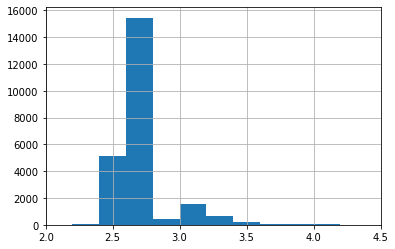

In [84]:
#рассмотрим гистограмму столбца 'ceiling_height'
#ограничим ее отображение по оси x, так как есть несколько квартир с очень высокими потолками 
#что мешает ее детальному изучению
data['ceiling_height'].hist(bins=18)
plt.xlim(2, 4.5)

Высота потолков квартир в большинстве случаев колеблется между 2.6 и 2.8 метрами. Есть также второй небольшой пик квартир в диапазоне более 3 метров. Я предполагаю, что это старые квартиры дореволюционной и сталинской эпохи, которых в Санкт-Петербурге не так мало.

<AxesSubplot:>

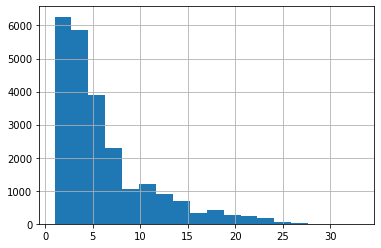

In [85]:
#рассмотрим гистограмму столбца 'floor'
data['floor'].hist(bins=18)

Несмотря на обилие многоэтажек В Санкт-Петербурге большинство людей размещает квартиры на этажах до 5. Это также может быть связано с тем, что в выборке также представлено большой количество квартир из Ленинградской области, где до недавнего времени не было большого количества высоток. 

<AxesSubplot:>

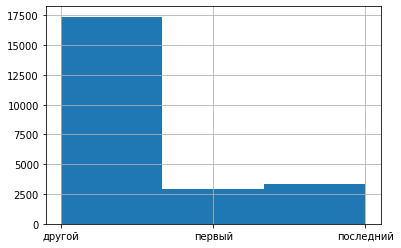

In [86]:
#рассмотрим гистограмму столбца 'type_floor'
data['type_floor'].hist(bins=3)

Большинство сдают квартиру не на первом и не на последнем этажах.

<AxesSubplot:>

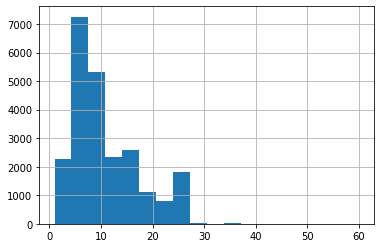

In [87]:
#рассмотрим гистограмму столбца 'floors_total'
data['floors_total'].hist(bins=18)

Здания больше 30 этажей это большая редкость в выборке. Пик наблюдается в промежутке 5-8 этажей, в основном по своему опыту я могу сказать, что это хрущевки и брежневки, которых полно в Санкт-Петербурге и области. Еще небольшой пик можно увидеть в райноне 25 этажа. Я предполагаю, что это новые питерские "муравейники".

<AxesSubplot:>

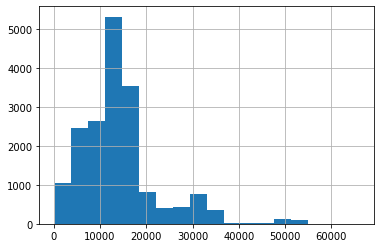

In [88]:
#рассмотрим гистограмму столбца 'cityCenters_nearest'
data['cityCenters_nearest'].hist(bins=18)

Распределение квартир от центра Санкт-Петербурга также имеет пуассоновский вид. В центре продают не так много квартир. Пик наблюдается в диапазоне 11-15 км от центра города. Второй пик наблюдается в районе 30 км от центра, предполагаю, что это ближний пригород. В районе 50 км также увеличивается количество квартир, возможно, города дальнего пригорода.

<AxesSubplot:>

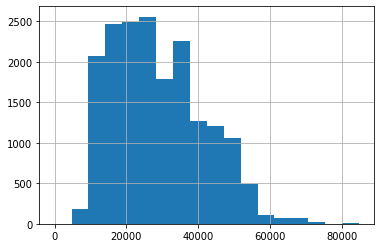

In [89]:
#рассмотрим гистограмму столбца 'airports_nearest'
data['airports_nearest'].hist(bins=18)

Большинство квартир находится достаточно удаленно от аэропорта, пик находится в диапазоне 15-25 км. 


<AxesSubplot:>

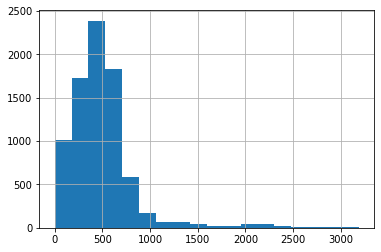

In [90]:
#рассмотрим гистограмму столбца 'parks_nearest'
data['parks_nearest'].hist(bins=18)

Большинство квартир находятся в пешей доступности от парков, пик находится в диапозоне 400-500 метров.

<AxesSubplot:>

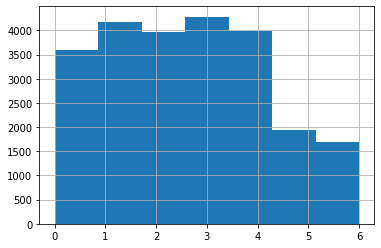

In [91]:
#рассмотрим гистограмму столбца 'day_of_week_exposition'
data['day_of_week_exposition'].hist(bins=7)

В выходные дни люди не склонны размещать объявления о продаже квартир и предпочитают это делать в рабочие дни.

<AxesSubplot:>

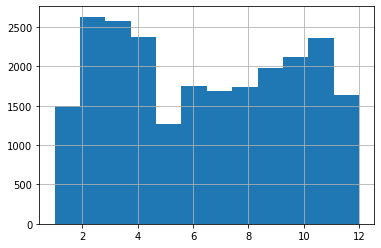

In [92]:
#рассмотрим гистограмму столбца 'month_exposition'
data['month_exposition'].hist(bins=12)


Люди менее всего склонны выкладывать на продажу свои квартиры в декабре, январе и мае (праздники?).

#### Как быстро продавались квартиры

<AxesSubplot:>

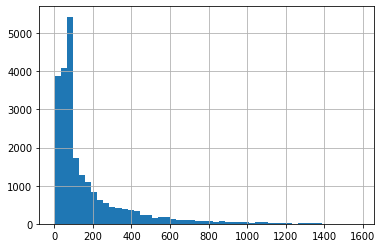

In [93]:
#рассмотрим гистограмму столбца 'days_exposition'
data['days_exposition'].hist(bins=50)

In [95]:
#определим средний срок продажи квартир
data['days_exposition'].mean()

169.20665565857996

In [96]:
#определим медиану срока продажи квартир
data['days_exposition'].median()

95.0

Медиана значительно меньше средней. Дело в том, что у распределения очень большие хвосты. Некоторые квартиры продаются годами. Из-за этого среднее значение смещается в верхнюю сторону. Поэтому медиана больше соответствует "типичному" сроку, за который удается продать квартиру. При этом существенная часть квартир продается и за месяц. 

**Вывод:** все столбцы изучены. Большинство из них имеет распределение Пуассона с очень длинным правым хвостом, что говорит а наличие ряда квартир с очень большими определенными параметрами.

#### Факторы, которые больше всего влияли на общую стоимость объекта

In [97]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_metr',
       'day_of_week_exposition', 'month_exposition', 'year_exposition',
       'type_floor', 'cityCenters_nearest_km'],
      dtype='object')

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

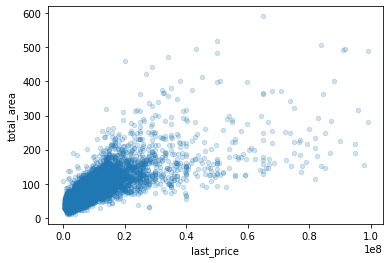

In [98]:
#Построим диаграмму рассеивания между стоимостью квартир и их площадью
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.2)

In [99]:
#Найдем корреляцию рассеивания между стоимостью квартир и их площадью
data['last_price'].corr(data['total_area'])

0.7692467812695775

Между размером квартиры и ее стоимостью есть явная зависимость, о чем говорит диаграмма рассеивания и высокая положительная корреляция.

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

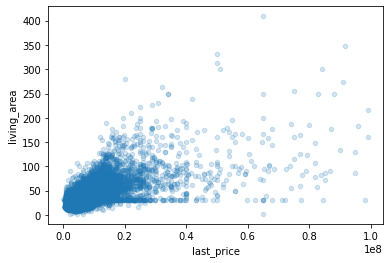

In [100]:
#Построим диаграмму рассеивания между стоимостью квартир и их жилой площадью
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.2)

In [101]:
#Найдем корреляцию рассеивания между стоимостью квартир и их жилой площадью
data['last_price'].corr(data['living_area'])

0.6405202759014433

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

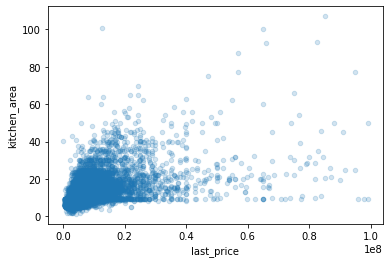

In [102]:
#Построим диаграмму рассеивания между стоимостью квартир и площадью их кухонь
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2)

In [103]:
#Найдем корреляцию рассеивания между стоимостью квартир и площадью их кухонь
data['last_price'].corr(data['kitchen_area'])

0.5544758072099075

Как и в случае с общей площадью, наблюдается значительная положительная связь между стоимостью квартиры и ее жилой площадью, а также площадью кухни, хоть и в меньшей степени. Я думаю, причина этого заключается в аномалии, которая наблюдается в диаграмме рассеивания между стоимостью квартир и их жилой площадью в диапазоне 35-40 метров, а также в диаграмме рассеивания между стоимостью квартир и площадью их кухонь в области 10 метров. На диаграммах в этих областях заметна четкая горизонтальная линия, которая не совсем естественно выглядит по сравнению с остальными значениями. При этом в первой деаграмме, где наблюдается зависимость между стоимостью квартиры и общей площадью, этой горизонтальной линии нет. Горизонтальная линия фактически означает отсутствия связи между параметрами. Сходу я не могу сказать, с чем связана данная аномалия, поэтому просто ее констатирую.

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

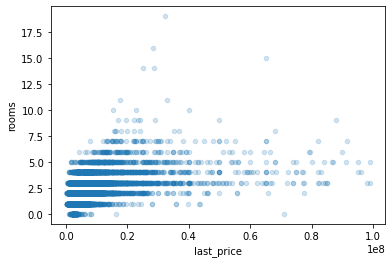

In [104]:
#Построим диаграмму рассеивания между стоимостью квартир и количеством комнат
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.2)

In [105]:
#Найдем корреляцию рассеивания между стоимостью квартир и площадью их кухонь
data['last_price'].corr(data['rooms'])

0.472660135991563

Положительная зависимость между количеством комнат и стоимостью квартир также обнаружена, однако она меньше, чем в предыдущих сравнениях. Примечателен вид диаграммы рассеивания, которая так отрывисто выглядит в виду небольшого количества вариантов количества комнат.

<AxesSubplot:xlabel='last_price', ylabel='type_floor'>

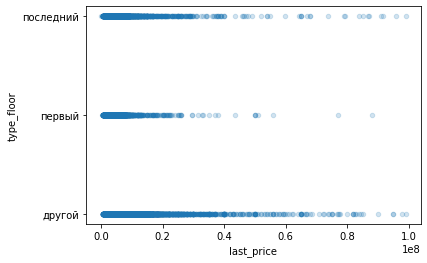

In [106]:
#Построим диаграмму рассеивания между стоимостью квартир и типом этажа
data.plot(x='last_price', y='type_floor', kind='scatter', alpha=0.2)

Диграмма рассеивания не очень подходит для номинативных переменных. Но уже можно увидеть, что не так много дорогих квартир продается на первом этаже. Чтобы лучше понять зависимость можно построить сводную таблицу по данным параметрам, в качестве аггрегирующей функции используем медиану, так как она менее восприимчива к выбросам и построим столбчатую диаграмму для визуализации.

<AxesSubplot:xlabel='type_floor'>

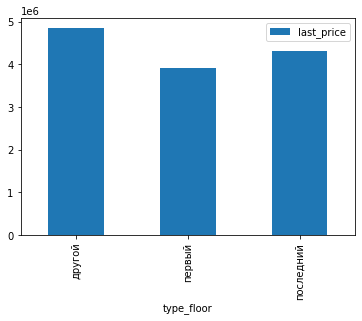

In [107]:
data.pivot_table(index='type_floor', values='last_price', aggfunc='median').plot(y='last_price', kind='bar')

Из столбчатой диаграммы видно, что в среднем квартиры на первых этажах самые дешевые, на последнем этаже чуть дороже, ну а самые дорогие - на прочих этажах. Для других номинативных переменных также будем использовать столбчатую диаграмму, аггрегированную по медианной стоимости. 

<AxesSubplot:xlabel='day_of_week_exposition'>

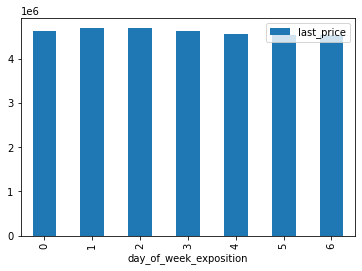

In [108]:
#составим диаграмму, которая показывает медианную стоимость квартир в заисимости от дня недели
data.pivot_table(index='day_of_week_exposition', values='last_price', aggfunc='median').plot(y='last_price', kind='bar')

Зависимость стоимости квартира от дня недели, в который она была размещена, не обнаружена.

<AxesSubplot:xlabel='month_exposition'>

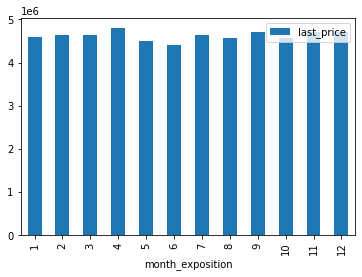

In [109]:
#составим диаграмму, которая показывает медианную стоимость квартир в заисимости от месяца
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(y='last_price', kind='bar')

Есть определенные колебания в стоимости квартир, в зависимости от месяца, когда они были размещены на продажу, однако они незначительны.

<AxesSubplot:xlabel='year_exposition'>

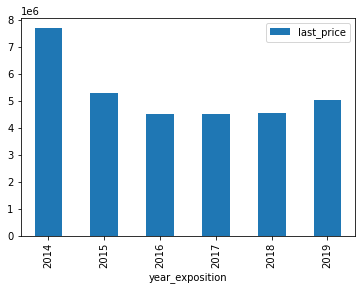

In [110]:
#составим диаграмму, которая показывает медианную стоимость квартир в заисимости от года
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(y='last_price', kind='bar')

Возможно, квартиры стали за эти годы меньше, а цена квадратного метра не изменилась. Это нужно проверить.

<AxesSubplot:xlabel='year_exposition'>

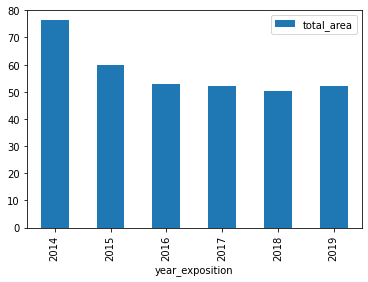

In [111]:
#составим диаграмму, которая показывает медианную площадь квартир в зависимости от года
data.pivot_table(index='year_exposition', values='total_area', aggfunc='median').plot(y='total_area', kind='bar')

<AxesSubplot:xlabel='year_exposition'>

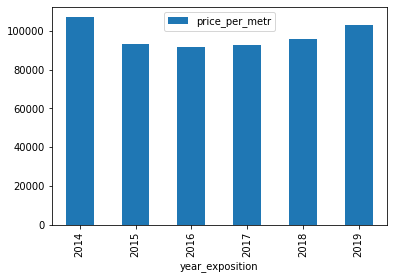

In [112]:
#составим диаграмму, которая показывает медианную стоимость квадратного метра квартир в зависимости от года
data.pivot_table(index='year_exposition', values='price_per_metr', aggfunc='median').plot(y='price_per_metr', kind='bar')

После 2014 года медианная стоимость квартир резко упала и начала постепенно восстанавливаться с 2017 года. В основном это связано с уменьшением медианной площади квартир. Цена квадратного метра также сократилась после 2014 года, однако в 2019 году практически восстановилась до прежнего уровня.

**Вывод**: в наибольшей степени на стоимость квартиры оказывает влияние ее общая площадь. Большинство остальных параметров также влияют на стоимость кватиры, но в меньшей степени. Совсем не влияет на стоимость квартиры день и месяц публикации объявления о ее продаже.

#### Средняя стоимость квадратного метра в различных городах

In [113]:
#Узнаем, в каких городах наибольшее количество объявлений, и какова в них средняя стоимость квадратного метра квартир
top10_amount = data.groupby('locality_name', as_index=False) \
    .agg({'last_price': 'count', 'price_per_metr': 'mean'}) \
    .rename(columns={'last_price': 'amount'}) \
    .sort_values(by='amount', ascending=False) \
    .head(10) \
    .sort_values(by='price_per_metr', ascending=False)
top10_amount

,locality_name,amount,price_per_metr
216,Санкт-Петербург,15663,113576.666169
195,Пушкин,369,103125.819291
102,Кудрово,471,95326.179139
164,Парголово,327,90175.913458
141,Мурино,588,86064.821204
288,Шушары,440,78677.364217
86,Колпино,338,75424.579098
41,Гатчина,306,68757.678644
33,Всеволожск,397,68719.320400
34,Выборг,235,58238.143141


<AxesSubplot:xlabel='locality_name'>

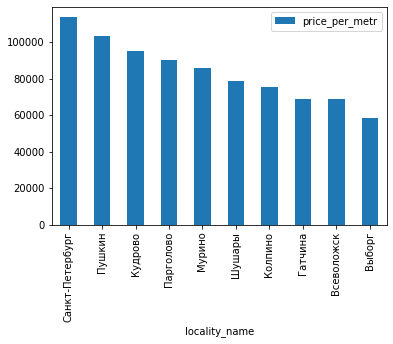

In [114]:
top10_amount.plot(x='locality_name', y='price_per_metr', kind='bar')

**Вывод:** Квартиры с самым дорогим квадратным метром ожидаемо в Санкт-Петербурге - более 110 тыс. руб. за квадратный метр. Также достаточно дорогое жилье (более 100 тыс. руб. за квадратный метр) в Пушкине, который находится относительно близко к Санкт-Петербургу и считается достаточно дорогим городом. Также дорогое жилье в "апендиксах" Санкт-Петербурга Кудрово, Парголово, и Мурино. А вот самое дешевое жилье в Выборге - менее 60 тыс. руб. за квадратный метр. Город очень удален от Санкт-Петербурга и близость к Финляндии ему не помогает. 

#### Средняя цена километра

In [115]:
#Выделим только квартиры, которые находятся в Санкт-Петербурге
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metr,day_of_week_exposition,month_exposition,year_exposition,type_floor,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,95.0,120370.370370,3,3,2019,другой,16.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.0,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.0,22,False,...,NaN,0.0,NaN,95.0,110544.692737,3,4,2019,другой,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,...,353.0,2.0,652.0,29.0,100566.572238,2,2,2018,другой,16.0
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.0,2,False,...,300.0,0.0,NaN,15.0,105769.230769,3,7,2018,другой,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,NaN,1.0,806.0,519.0,129903.978052,3,10,2016,другой,4.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,95.0,72490.845228,1,3,2017,другой,4.0


In [116]:
#составим сводную таблицу, в которой бы отражалась средняя цена за один квадратный метр на каждый километр от центра
spb_pivot = data_spb.pivot_table(index='cityCenters_nearest_km', values='price_per_metr').reset_index()
spb_pivot

,cityCenters_nearest_km,price_per_metr
0,0.0,231767.956010
1,1.0,155042.448039
2,2.0,148261.204372
3,3.0,121225.876844
4,4.0,128411.381628
5,5.0,137557.895576
6,6.0,146045.227642
7,7.0,153123.328886
8,8.0,124335.216202
9,9.0,113131.041911


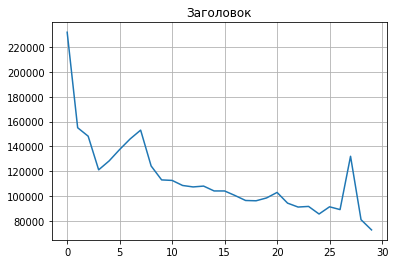

In [117]:
#составим график по сводной таблице
spb_pivot['price_per_metr'].plot(grid = True, title = 'Заголовок')
plt.show()

Из графика видно, что в среднем стоимость квадратного метра квартир падает по мере удаления от центра. При этом наиболее значительное падение наблюдается до 4 км от центра. Выглядят аномальным рост стоимости квартир с 4 по 7 км от центра, а также диапазоне от 26 до 27 км от центра. Возможно, это связано с особенностью географии города. Например, в диапазоне 4-7 км находятся новые элитные ЖК, которые находятся за пределами исторической застройки, но все-таки близкие к центру. А в диапазоне 26-27 могут находится элитные поселки на окраине города (как московская "Рублевка").  

In [118]:
#сделаем цикл, чтобы понять, насколько в среднем снижается стоимость одного квадратного метра при удалении от центра
i = 0 #создаем счетчик
sum_difference = 0 #создаем переменну, в которую будем накапливать разницу в стоим. кв. м в завиимости от расстояния от центра
for raw in range(len(spb_pivot['price_per_metr'])):
    if i > 0: #пропускаем первую итерацию цикла, иначе из первого километра будет вычитаться нулевой
        sum_difference += (spb_pivot['price_per_metr'][raw] - spb_pivot['price_per_metr'][raw-1])
    i+=1
print(sum_difference / (len(spb_pivot['price_per_metr'] - 1))) #находим среднее снижение стоимости одного метра

-5293.819685530393


Вывод: среднее снижение стоимости одного квадратного метра на километр от центра составляет около 5.3 тыс. рублей. Можно сказать наоборот, что с каждым километром ближе к центру Санкт-Петербурга стоимость одного квадратного метра квартир повышается на 5.3 тыс. рублей.

### Общий вывод

Большинство квартир, которые представлены на рынке Санкт-Петербурга и области, - небольшие одно- и двухкомнатные квартиры, средней площадью 50-60 метров и стоимостью 4.5-6.5 млн руб. Подавляющее число квартир стоит до 10 млн руб. При этом существует небольшая прослойка элитных квартир, которые стоят больше. Небольшое число квартир и вовсе стоит более 100 млн руб., и сходу трудно сказать, за счет чего такая высокая стоимость, так как многие из них имеют небольшую площадь, которая является основным фактором, определяющим стоимость квартир. Также на стоимость квартир влияют и другие параметры, такие как этаж или год, когда было опубликовано объявление о продажи. С 2014 года медианная стоимость квартир значительно снизилась преимущественно из-за сокращения медианной площади квартир. Самые дорогой квадратный метр квартир ожидаемо в Санкт-Петербурге, при этом почти такие же цены на квартиры есть и в г. Пушкин, который является пригородом Санкт-Петербурга. Наблюдается явная связь между стоимостью квартир и удалением их от центра Санкт-Петербурга, однако в некоторых диапазонах от городского центра стоимость квадратного метра жилья начинает дорожать.